In [3]:
import turicreate as tc

In [4]:
images = tc.load_images("./data/")

In [5]:
annotations = tc.SFrame('annotations.csv')

Read 17 lines. Lines per second: 420.043

Finished parsing file /Users/GaelGil/Desktop/GitRepos/notebooks/sneakers/annotations.csv

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,list]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Parsing completed. Parsed 17 lines in 0.04147 secs.

Finished parsing file /Users/GaelGil/Desktop/GitRepos/notebooks/sneakers/annotations.csv

Parsing completed. Parsed 17 lines in 0.010342 secs.

In [6]:
annotations

path,annotations
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,"[{'coordinates':{'height': 160, 'width': ..."
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,"[{'coordinates':{'height': 17, 'width': ..."
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,"[{'coordinates':{'height': 18, 'width': ..."
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,"[{'coordinates':{'height': 14, 'width': ..."
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,"[{'coordinates':{'height': 169, 'width': ..."
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,"[{'coordinates':{'height': 12, 'width': ..."
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,"[{'coordinates':{'height': 40, 'width': ..."
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,"[{'coordinates':{'height': 196, 'width': ..."
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,"[{'coordinates':{'height': 23, 'width': ..."
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,"[{'coordinates':{'height': 196, 'width': ..."


In [11]:
data = images.join(annotations)

In [12]:
data

path,image,annotations
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,Height: 355 Width: 491,"[{'coordinates':{'height': 160, 'width': ..."
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,Height: 417 Width: 245,"[{'coordinates':{'height': 17, 'width': ..."
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,Height: 264 Width: 117,"[{'coordinates':{'height': 18, 'width': ..."
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,Height: 499 Width: 421,"[{'coordinates':{'height': 14, 'width': ..."
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,Height: 499 Width: 421,"[{'coordinates':{'height': 169, 'width': ..."
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,Height: 135 Width: 204,"[{'coordinates':{'height': 12, 'width': ..."
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,Height: 484 Width: 703,"[{'coordinates':{'height': 40, 'width': ..."
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,Height: 484 Width: 703,"[{'coordinates':{'height': 196, 'width': ..."
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,Height: 579 Width: 667,"[{'coordinates':{'height': 23, 'width': ..."
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,Height: 579 Width: 667,"[{'coordinates':{'height': 196, 'width': ..."


In [20]:
model = tc.object_detector.create(data, max_iterations=1)

Using 'image' as feature column
Using 'annotations' as annotations column


Using CPU to create model.

Instructions for updating:
non-resource variables are not supported in the long term


Setting 'batch_size' to 32

+--------------+--------------+--------------+

| Iteration    | Loss         | Elapsed Time |

+--------------+--------------+--------------+

| 1            | 58.6024      | 32.38s       |

+--------------+--------------+--------------+

In [ ]:
# predictions = model.predict(test_data)

In [16]:
testImages = tc.load_images("./directory/")

In [17]:
testImages

path,image
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,Height: 377 Width: 544
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,Height: 502 Width: 415
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,Height: 377 Width: 544
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,Height: 900 Width: 1440


In [14]:
testDataAnnotations = tc.SFrame('testAnnnotations.csv')

Finished parsing file /Users/GaelGil/Desktop/GitRepos/notebooks/sneakers/testAnnnotations.csv

Parsing completed. Parsed 5 lines in 0.046018 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,list]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/GaelGil/Desktop/GitRepos/notebooks/sneakers/testAnnnotations.csv

Parsing completed. Parsed 5 lines in 0.00851 secs.

In [22]:
testData = testImages.join(testDataAnnotations)

In [23]:
testData

path,image,annotations
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,Height: 502 Width: 415,"[{'coordinates':{'height': 337, 'width': ..."
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,Height: 377 Width: 544,"[{'coordinates':{'height': 27, 'width': ..."
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,Height: 900 Width: 1440,"[{'coordinates':{'height': 889, 'width': ..."
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,Height: 900 Width: 1440,"[{'coordinates':{'height': 1210, 'wid ..."
/Users/GaelGil/Desktop/GitRepos/notebooks/snea ...,Height: 900 Width: 1440,"[{'coordinates':{'height': 363, 'width': ..."


In [25]:
predictions = model.predict(testData)

In [ ]:
metrics = model.evaluate(testData)

In [ ]:
metrics

In [24]:
testData['image_with_ground_truth'] = \
    tc.object_detector.util.draw_bounding_boxes(testData['image'], testData['annotations'])
testData.explore()

ToolkitError: Received exception at row 1: argument of type 'NoneType' is not iterable

,path,image,annotations
0,/Users/GaelGil/Desktop/GitRepos/notebooks/sneakers/data/Screen Shot 2020-09-13 at 4.03.48 PM.png,,"[{'coordinates': {'height': 160, 'width': 469, 'x': 6, 'y': 234}, 'label': 'jordan_three'}]"
1,/Users/GaelGil/Desktop/GitRepos/notebooks/sneakers/data/Screen Shot 2020-09-13 at 3.44.14 PM.png,,"[{'coordinates': {'height': 17, 'width': 225, 'x': 18, 'y': 360}, 'label': 'jordan_three'}]"
2,/Users/GaelGil/Desktop/GitRepos/notebooks/sneakers/data/Screen Shot 2020-09-13 at 3.44.51 PM.png,,"[{'coordinates': {'height': 18, 'width': 107, 'x': 13, 'y': 242}, 'label': 'jordan_three'}]"
3,/Users/GaelGil/Desktop/GitRepos/notebooks/sneakers/data/Screen Shot 2020-09-14 at 5.05.07 PM.png,,"[{'coordinates': {'height': 14, 'width': 317, 'x': 237, 'y': 446}, 'label': 'jordan_three'}]"
4,/Users/GaelGil/Desktop/GitRepos/notebooks/sneakers/data/Screen Shot 2020-09-14 at 5.05.07 PM.png,,"[{'coordinates': {'height': 169, 'width': 398, 'x': 212, 'y': 343}, 'label': 'jordan_three'}]"
5,/Users/GaelGil/Desktop/GitRepos/notebooks/sneakers/data/quai.png,,"[{'coordinates': {'height': 12, 'width': 195, 'x': 8, 'y': 113}, 'label': 'jordan_three'}]"
6,/Users/GaelGil/Desktop/GitRepos/notebooks/sneakers/data/Screen Shot 2020-09-14 at 5.04.52 PM.png,,"[{'coordinates': {'height': 40, 'width': 408, 'x': 207, 'y': 398}, 'label': 'jordan_three'}]"
7,/Users/GaelGil/Desktop/GitRepos/notebooks/sneakers/data/Screen Shot 2020-09-14 at 5.04.52 PM.png,,"[{'coordinates': {'height': 196, 'width': 676, 'x': 184, 'y': 452}, 'label': 'jordan_three'}]"
8,/Users/GaelGil/Desktop/GitRepos/notebooks/sneakers/data/Screen Shot 2020-09-13 at 4.02.58 PM.png,,"[{'coordinates': {'height': 23, 'width': 473, 'x': 16, 'y': 458}, 'label': 'jordan_three'}]"
9,/Users/GaelGil/Desktop/GitRepos/notebooks/sneakers/data/Screen Shot 2020-09-13 at 4.02.58 PM.png,,"[{'coordinates': {'height': 196, 'width': 653, 'x': 13, 'y': 563}, 'label': 'jordan_three'}]"

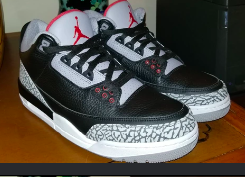
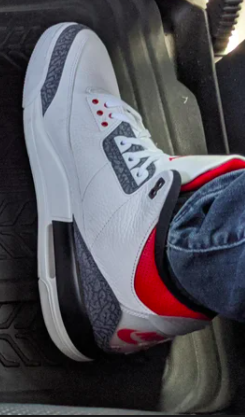
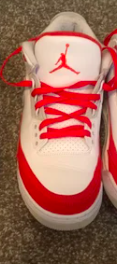
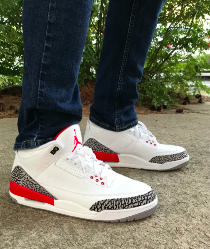
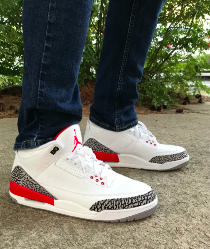
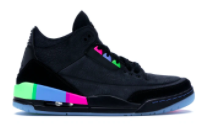
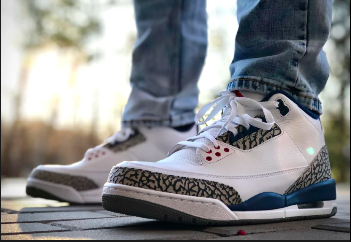
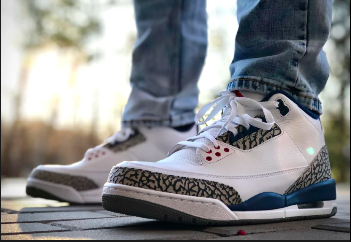
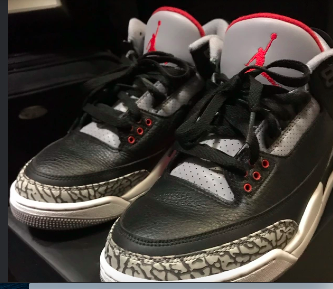
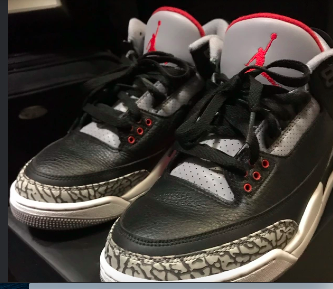
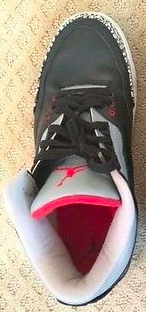
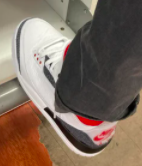
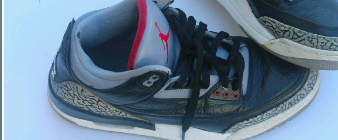
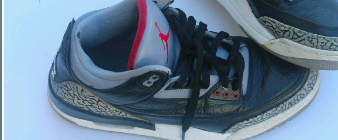
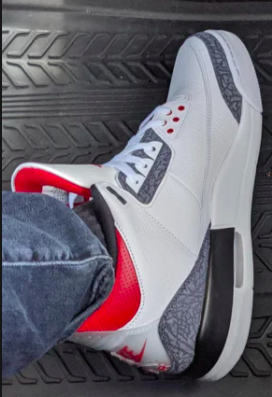
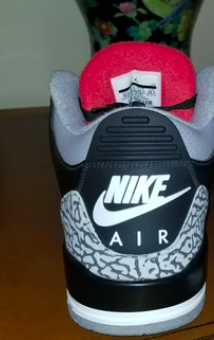
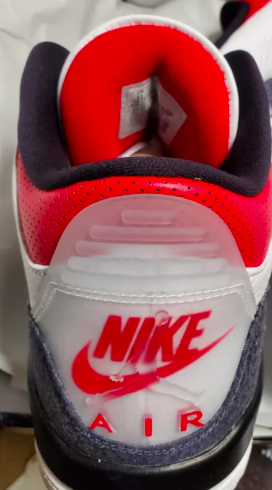

In [13]:
data.explore()